# Feature Selection - Dropping Constant Features 

In this step we remove constant features from our dataset which is not important for problem solving.

### 1.Varience Threshold

Feature selector that removes all low-variance features.

**threshold: float, default=0**

Features with a training-set variance lower than this threshold will be removed. The default is to keep all features with non-zero variance, i.e. remove the features that have the same value in all samples.

In [24]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('train.csv')

In [11]:
df.shape

(76020, 371)

In [12]:
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [13]:
X=df.drop(labels=['TARGET'],axis=1)
y=df['TARGET']

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
X_train.shape,X_test.shape

((53214, 370), (22806, 370))

#### Lets apply variance threshold

In [18]:
from sklearn.feature_selection import VarianceThreshold

In [19]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [21]:
sum(var_thres.get_support())

332

### 2. Correlation

#### We remove fetaures which are highly corellated to each others.

<Axes: >

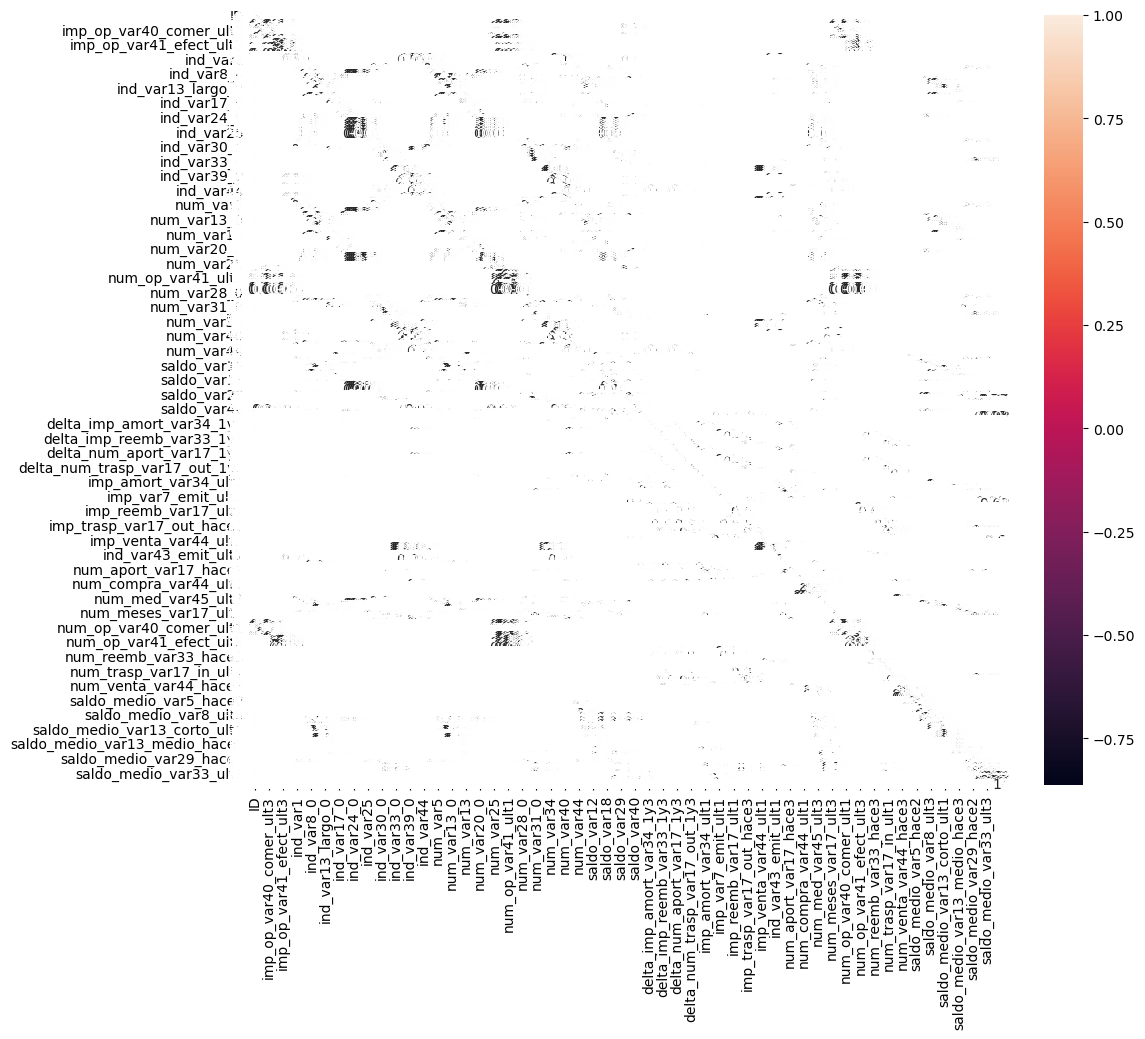

In [26]:
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True)

## 3.Information Gain- mutual inofrmation in classification problem 


**Note:- the above method is only used for classificaiton problem.**
 
 we use above test to select indepent features which has strong relationship with dependent feature(target) using entropy .
 
 The selector compares a each independent feature with dependent feature and gets the relation ship . 
 
 After that by using K best method we select only k features with best reslationship for our probelm stratement.

In [29]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


(   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
 0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
 1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
 2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
 3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
 4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   
 
    Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
 0                  0.28     2.29       5.64  1.04  3.92     1065  
 1                  0.26     1.28       4.38  1.05  3.40     1050  
 2                  0.30     2.81       5.68  1.03  3.17     1185  
 3                  0.24     2.18       7.80  0.86  3.45     1480  
 4                  0.39     1.82       4.32  1.04  2.93      735  ,
 None)

In [30]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [36]:
X=df.drop(labels=['Wine'],axis=1)
y=df['Wine']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [38]:
X_train.shape,X_test.shape

((124, 13), (54, 13))

In [39]:
from sklearn.feature_selection import mutual_info_classif

In [42]:
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.42597312, 0.29829956, 0.17116495, 0.24251957, 0.18121328,
       0.48123406, 0.71591617, 0.13228902, 0.26382495, 0.61527074,
       0.54709073, 0.54974969, 0.5297371 ])

In [44]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.715916
Color.int               0.615271
OD                      0.549750
Hue                     0.547091
Proline                 0.529737
Phenols                 0.481234
Alcohol                 0.425973
Malic.acid              0.298300
Proanth                 0.263825
Acl                     0.242520
Mg                      0.181213
Ash                     0.171165
Nonflavanoid.phenols    0.132289
dtype: float64

### Observation

Flavanoids has the highest dependency on target .

Nonflavanoid.phenols has lowest dependency on target.

#### So first we need to analyze how many features we require for problem statement.And select top 10 or 20 using selectkbest

### SelectKBest

In [47]:
from sklearn.feature_selection import SelectKBest
select_five_cols=SelectKBest(mutual_info_classif,k=5)
select_five_cols.fit(X_train.fillna(0),y_train)
X_train.columns[select_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

## Feature selection - Information Gain - mutual information in regression problem statements

In [48]:
df=pd.read_csv('https://raw.githubusercontent.com/JoannaBroniarek/House-Prices-Advanced-Regression-Techniques/master/dane/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
numericlist=['int64','float64']
numerical_cols=list(df.select_dtypes(include=numericlist).columns)
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [59]:
housing_df=df[numerical_cols]
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [60]:
housing_df.drop(labels='Id',inplace=True,axis=1)
housing_df

C:\Users\z004vc9h\AppData\Local\Temp\ipykernel_15388\2088115486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df.drop(labels='Id',inplace=True,axis=1)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [57]:
housing_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [61]:
X=housing_df.drop(labels=['SalePrice'],axis=1)
y=housing_df['SalePrice']

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,y_train.shape

((1022, 36), (1022,))

In [63]:
from sklearn.feature_selection import mutual_info_regression

In [64]:
mutual_info=mutual_info_regression(X_train.fillna(0),y_train)

In [65]:
mutual_info

array([0.25848127, 0.21051681, 0.16348156, 0.53761338, 0.10184898,
       0.3575434 , 0.24658486, 0.09007875, 0.16482966, 0.01426709,
       0.11262945, 0.38382007, 0.31079123, 0.22919738, 0.00968318,
       0.48158714, 0.01797825, 0.        , 0.27647106, 0.08593537,
       0.03878239, 0.        , 0.18496045, 0.18184188, 0.26996475,
       0.38803175, 0.37051355, 0.07160126, 0.17235971, 0.02207965,
       0.        , 0.02261928, 0.        , 0.        , 0.        ,
       0.00771146])

#### Now here we are selecting top 10 or 20 using SelectPercentile

In [67]:
from sklearn.feature_selection import SelectPercentile

In [68]:
selectperc=SelectPercentile(mutual_info_regression,percentile=20)
selectperc.fit(X_train.fillna(0),y_train)
X_train.columns[selectperc.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')